In [3]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv("netflix_titles.csv")
df.head()

# Ver las primeras filas para entender la estructura
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Información general del dataset antes de limpiar
df.info()

# Identificar valores nulos
missing_values = df.isnull().sum()

# Identificar columnas irrelevantes (por ejemplo, 'show_id' no es útil para análisis)
columns_to_drop = ['show_id', 'description']

# Identificar filas duplicadas
duplicate_rows = df.duplicated().sum()

# Identificar tipos de variables
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

missing_values, columns_to_drop, duplicate_rows, categorical_columns, numerical_columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


(show_id            0
 type               0
 title              0
 director        2634
 cast             825
 country          831
 date_added        10
 release_year       0
 rating             4
 duration           3
 listed_in          0
 description        0
 dtype: int64,
 ['show_id', 'description'],
 0,
 ['show_id',
  'type',
  'title',
  'director',
  'cast',
  'country',
  'date_added',
  'rating',
  'duration',
  'listed_in',
  'description'],
 ['release_year'])

In [7]:
# Eliminar columnas irrelevantes
df_cleaned = df.drop(columns=columns_to_drop)

# Rellenar valores nulos en columnas categóricas con "Desconocido"
categorical_fill = ['director', 'cast', 'country', 'rating', 'duration']
for col in categorical_fill:
    df_cleaned[col] = df_cleaned[col].fillna("Desconocido")

# Para 'date_added', rellenamos con la moda (fecha más frecuente)
df_cleaned['date_added'] = df_cleaned['date_added'].fillna(df_cleaned['date_added'].mode()[0])

# Verificar cambios
df_cleaned.info(), df_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      8807 non-null   object
 3   cast          8807 non-null   object
 4   country       8807 non-null   object
 5   date_added    8807 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8807 non-null   object
 8   duration      8807 non-null   object
 9   listed_in     8807 non-null   object
dtypes: int64(1), object(9)
memory usage: 688.2+ KB


(None,
 type            0
 title           0
 director        0
 cast            0
 country         0
 date_added      0
 release_year    0
 rating          0
 duration        0
 listed_in       0
 dtype: int64)

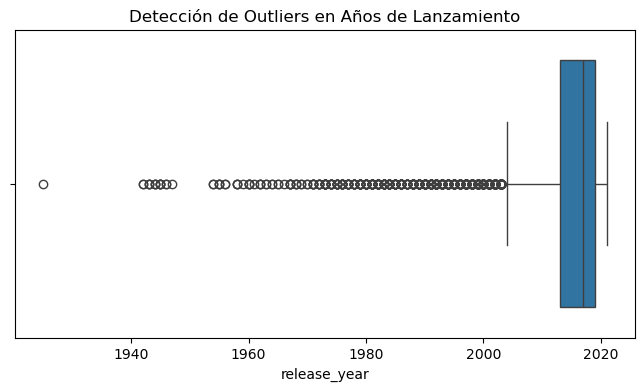

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
22,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",Desconocido,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies"
24,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies"
26,Movie,Minsara Kanavu,Rajiv Menon,"Arvind Swamy, Kajol, Prabhu Deva, Nassar, S.P....",Desconocido,"September 21, 2021",1997,TV-PG,147 min,"Comedies, International Movies, Music & Musicals"
41,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas"
...,...,...,...,...,...,...,...,...,...,...
8764,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure
8766,Movie,XXx,Rob Cohen,"Vin Diesel, Asia Argento, Marton Csokas, Samue...",United States,"January 1, 2019",2002,PG-13,124 min,"Action & Adventure, Sports Movies"
8768,Movie,Y Tu Mamá También,Alfonso Cuarón,"Maribel Verdú, Gael García Bernal, Diego Luna,...",Mexico,"June 1, 2017",2001,R,106 min,"Dramas, Independent Movies, International Movies"
8770,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies"


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identificar outliers en release_year con un boxplot
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_cleaned['release_year'])
plt.title("Detección de Outliers en Años de Lanzamiento")
plt.show()

# Calcular límites para detectar outliers
Q1 = df_cleaned['release_year'].quantile(0.25)
Q3 = df_cleaned['release_year'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_cleaned[(df_cleaned['release_year'] < lower_bound) | (df_cleaned['release_year'] > upper_bound)]
outliers
